# **Dean Loeafoe Quiz 4**
## **ED and Logistic Regression of Banking Data**
### **Part 1 Introduction**
The banking industry in the USA is highly regulated. Banks are required to adhere to strict guidelines regarding the
management of customer deposits, the maintaining of customer privacy, and the avoidance of discrimination when
approving or rejecting loan applications. Many years ago, banks engaged in the practice of “redlining” when approving
loans for home mortgages, which basically amounted to the automatic rejection of loan applications for homes located
in certain areas that were deemed by banks to be overly prone to loan defaults. When such practices were deemed to
be discriminatory by bank regulators, banks adjusted their mortgage lending practices in an attempt to make them more
objective. However, regulators remain concerned that discrimination can exist even when what appear to be purely
objective criteria are used for purposes of deciding whether or not a customer is approved for a loan.

**Statement of Problem**
* The task is to develop a model that can predict whether or not a given mortgage loan application is likely to be approved or denied. The regulator plans to use the output of such a model in an attempt
to identify potential instances of discrimination in the lending practices of the banks for which it is tasked with
regulating.

### Part 2: Data **Summary**
The data set you will be using is sourced from the Federal Reserve Bank of Boston. The data set comprises 2,381 observations of 1 response/dependent variable (which indicates whether or not a mortgage application was denied) and 12 explanatory/independent variables.

*dir - debt payments to total income ratio

*hir - housing expenses to income ratio

*lvr - ratio of size of loan to assessed value of property

*ccs - consumer credit score from 1 to 6 (a low value being a good score)

*mcs - mortgage credit score from 1 to 4 (a low value being a good score)

*pbcr - public bad credit record ?

*dmi - denied mortgage insurance ?

*self - self employed ?

*single - is the applicant single ?

*uria - 1989 Massachusetts unemployment rate in the applicant's industry

*condominium - is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

*black - is the applicant black ?

*deny - mortgage application denied ?

In [51]:
#Initialize data
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/espio11/Data-Analytics-Summer-2022/main/HDMA%20Boston%20Housing%20Data", sep = ",")
del df['Unnamed: 0'] #Deleted unnecessary column that held a row count
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [52]:
#I did this to ensure the ensure I grabbed the entire file
df.tail()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [53]:
#Checking the shape to make sure all columns and rows are included
print(df.shape)

(2381, 13)


In [54]:
#Checking the data type and non-null count of each column
df.info()
#non-null objects need to be handled in pbcr and self columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


## **Part 2: Data preparation**
In this section, I will search for and handle any values that are unexpected or do not provide information to the data set. Usually, I would also handle outliers in this section. I will not do so in this case. The reason for this is because I want my model to somewhat be able to draw a meaningful conslusion for an individual with an unusual set of attributes. Leaving in the outliers will aid in this goal.

In [55]:
#Checking for zero values in columns in which there should not be
#No erroneous zero values were found
df.min() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


dir             0.0
hir             0.0
lvr            0.02
ccs             1.0
mcs             1.0
dmi              no
single           no
uria            1.8
comdominiom       0
black            no
deny             no
dtype: object

In [56]:
#Print unique values and check column for ?
temp =  df['dir'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0.221      0.265      0.37200001 0.32       0.36       0.24
 0.35       0.28       0.31       0.18       0.23       0.37
 0.39       0.33       0.3        0.26       0.34       0.38
 0.44       0.41       0.29       0.27       0.16       0.314
 0.33200001 0.39900001 0.34200001 0.37599998 0.32099998 0.279
 0.31700001 0.285      0.365      0.33700001 0.35200001 0.34400001
 0.37799999 0.25799999 0.21799999 0.27200001 0.35900002 0.39700001
 0.219      0.38799999 0.25       0.31200001 0.35799999 0.61
 0.26299999 0.26200001 0.46       0.305      0.38400001 0.264
 0.47       0.19       0.38200001 0.325      0.39799999 0.395
 0.40700001 0.301      0.266      0.26799999 0.269      0.40900001
 0.30799999 0.311      0.32799999 0.38380001 0.33799999 0.281
 0.3923     0.36299999 0.2458     0.38209999 0.286      0.315
 0.30469999 0.36599999 0.37099998 0.38099998 0.26520001 0.35700001
 0.43       0.4        0.40599999 0.73       0.38299999 0.29299999
 0.24030001 0.194      0.294      0.3798     0.33

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [57]:
#Print unique values and check column for ?
temp =  df['hir'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[2.21000004e-01 2.65000000e-01 2.47999992e-01 2.50000000e-01
 3.50000000e-01 1.70000000e-01 2.90000000e-01 2.20000000e-01
 2.40000000e-01 2.70000000e-01 3.00000000e-01 3.40000000e-01
 1.50000000e-01 2.80000000e-01 3.10000000e-01 3.20000000e-01
 3.30000000e-01 1.30000000e-01 2.10000000e-01 2.00000000e-01
 2.60000000e-01 1.00000000e-01 1.90000000e-01 8.00000000e-02
 2.81000004e-01 2.72000008e-01 3.22000008e-01 2.77999992e-01
 2.51000004e-01 2.07999992e-01 2.46000004e-01 3.13999996e-01
 2.88999996e-01 2.25000000e-01 1.93999996e-01 8.19999980e-02
 2.85000000e-01 2.43999996e-01 2.12999992e-01 1.80000000e-01
 2.56000004e-01 2.30000000e-01 1.01999998e-01 3.90000000e-01
 2.26000004e-01 2.57999992e-01 2.17999992e-01 2.15000000e-01
 3.08999996e-01 1.41999998e-01 2.77000008e-01 2.61000004e-01
 3.22999992e-01 3.57999992e-01 3.06000004e-01 3.37000008e-01
 1.98999996e-01 3.17999992e-01 2.57000008e-01 2.42000008e-01
 3.15000000e-01 3.11000004e-01 1.60000000e-01 3.27999992e-01
 2.89400005e-01 2.529999

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [58]:
#Print unique values and check column for ?
temp =  df['lvr'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0.8        0.921875   0.92039801 ... 0.52676056 0.81355932 0.7007829 ]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [59]:
#Print unique values and check column for ?
temp =  df['ccs'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[5.         2.         1.         6.         3.         4.
 2.11638656]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [60]:
#Print unique values and check column for ?
temp =  df['mcs'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[2.        1.        4.        3.        1.7210084]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [61]:
#Print unique values and check column for ?
temp =  df['pbcr'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

['no' 'yes' nan]
No ? found


In [62]:
#Check to see if the non-null count for pbcr has increased after changes have been made
df['pbcr'].fillna(df['pbcr'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2381 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


In [63]:
#Double check that the abnormal values were handled
temp =  df['pbcr'].unique()
print(temp)

['no' 'yes']


In [64]:
#Print unique values and check column for ?
temp =  df['dmi'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

['no' 'yes']
No ? found


In [65]:
#Print unique values and check column for ?
temp =  df['self'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

['no' 'yes' nan]
No ? found


In [66]:
#Check to see if the non-null count for self has increased after changes have been made
df['self'].fillna(df['self'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2381 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2381 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


In [67]:
#Double check that the abnormal values were handled
temp =  df['pbcr'].unique()
print(temp)

['no' 'yes']


In [68]:
#Print unique values and check column for ?
temp =  df['single'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

['no' 'yes']
No ? found


In [69]:
#Print unique values and check column for ?
temp =  df['uria'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[ 3.9000001   3.20000005  4.30000019  1.79999995  3.0999999  10.60000038
  5.30000019  3.5999999   2.          8.89999962  3.77449585]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [70]:
#Print unique values and check column for ?
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[ 3.9000001   3.20000005  4.30000019  1.79999995  3.0999999  10.60000038
  5.30000019  3.5999999   2.          8.89999962  3.77449585]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
#Print unique values and check column for ?
temp =  df['black'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

['no' 'yes']
No ? found


In [72]:
#Print unique values and check column for ?
temp =  df['deny'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

['no' 'yes']
No ? found


## Part 4: Exploratory Data Analysis (EDA) / Prepped Data Review ##
#### Step 1: Run descriptive statistics for each attribute ####
deny is the only response variable while pbcr, self employed, dmi, single and black are all categorical attributes and will be excluded from this section since they are not numerical categories. comdominium does have numerical statistics but it will also be excluded from this section because its unique values are 0 and 1. This means these are actually boolean values and should not be viewed as regular numbers. The numerical attributes are comprised of dir, hir, lvr, ccs, mcs and uria. Each of these are filled with floating point number values.

### **Discussion of Results:**
* dir: The mean of the dir attribute is 0.330814 while median is 0.33. Since the median is lesser than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.0 while max is at 3.0. Looking at the standard deviation, the observations seem to be not as far from its mean.

* hir: The mean of the hir attribute is 0.255346 while median is 0.26. Since the median is greater than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.0 while max is at 3.0. Looking at the standard deviation, the observations seem to be not as far from its mean.

* lvr: The mean of the lvr attribute is 0.737760 while median is 0.779412. Since the median is greater than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.02 while max is at 1.95. Looking at the standard deviation, the observations seem to be not as far from its mean.

* ccs: The mean of the ccs attribute is 2.116387 while median is 1. Since the median is lesser than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 1 while max is at 6. Looking at the standard deviation, the observations seem to be not as far from its mean.

* uria: The mean of the mcs attribute is 3.774496 while median is 3.2. Since the median is lesser than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 1.8 while max is at 10.6. Looking at the standard deviation, the observations seem to be not as far from its mean.

In [73]:
df.describe() #displays descriptive stats for all numeric variables

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [74]:
print(df['deny'].value_counts())  #prints count for each sex category
print(df['deny'].value_counts()/len(df)) #prints proportion of each sex category

no     2096
yes     285
Name: deny, dtype: int64
no     0.880302
yes    0.119698
Name: deny, dtype: float64


**Discussion of Result:** This shows that for this dataset, around 12% of applicants are denied loans while around 88% of applicants are granted loans

**Step 2: Provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn**

{'boxes': [<matplotlib.lines.Line2D at 0x7f5213374b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f521337cb10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5213382b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5213382610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f521337c090>,
  <matplotlib.lines.Line2D at 0x7f521337c5d0>]}

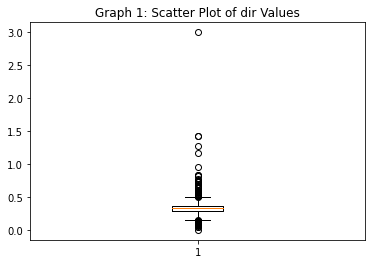

In [89]:
plt.title('Graph 1: Scatter Plot of dir Values')
plt.boxplot(df['dir'])

**Discussion of Result:**
This boxplot shows us that the median of the dir values is about .3. On top of that, the scatterplot reveals there are a great deal of outliers distributed away from the mean at both ends of the graph.

{'boxes': [<matplotlib.lines.Line2D at 0x7f52132e4c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52132ebc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52132f2c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f52132f2710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52132eb190>,
  <matplotlib.lines.Line2D at 0x7f52132eb6d0>]}

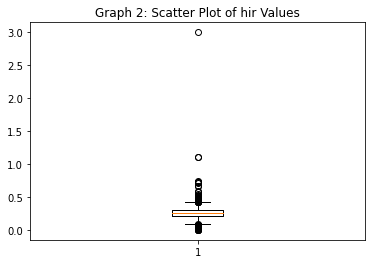

In [90]:
plt.title('Graph 2: Scatter Plot of hir Values')
plt.boxplot(df['hir'])

**Discussion of Result:**
This boxplot shows us that the median of the dir values is about .25. On top of that, the scatterplot reveals there are a great deal of outliers distributed near the higher end of the graph with some concentrated near the min.

{'boxes': [<matplotlib.lines.Line2D at 0x7f5213255d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f521325ad10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5213261d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5213261810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f521325a290>,
  <matplotlib.lines.Line2D at 0x7f521325a7d0>]}

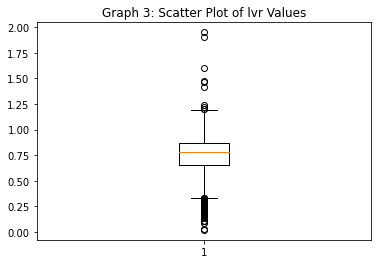

In [91]:
plt.title('Graph 3: Scatter Plot of lvr Values')
plt.boxplot(df['lvr'])

**Discussion of Result:**
This boxplot shows us that the median of the lvr values is about .8. On top of that, the scatterplot reveals there are a great deal of outliers distributed near the min with some concentrated near the higher end of the graph.

{'boxes': [<matplotlib.lines.Line2D at 0x7f52131d0910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52131d5910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52131dd950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f52131dd410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52131d0e50>,
  <matplotlib.lines.Line2D at 0x7f52131d53d0>]}

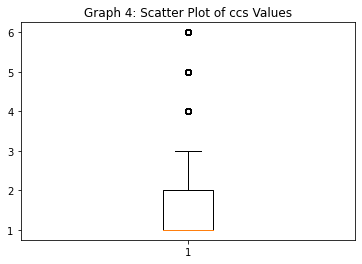

In [92]:
plt.title('Graph 4: Scatter Plot of ccs Values')
plt.boxplot(df['ccs'])

**Discussion of Result:**
This boxplot shows us that the median of the ccs values is about 1. On top of that, the scatterplot reveals there are a few outliers at the higher end of the graph.

{'boxes': [<matplotlib.lines.Line2D at 0x7f52131be550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52131c3550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f521314c590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f521314c050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52131bea90>,
  <matplotlib.lines.Line2D at 0x7f52131befd0>]}

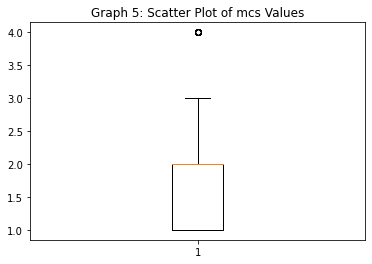

In [93]:
plt.title('Graph 5: Scatter Plot of mcs Values')
plt.boxplot(df['mcs'])

Discussion of Result: This boxplot shows us that the median of the ccs values is about 2. On top of that, the scatterplot reveals there is one outlier near the max.

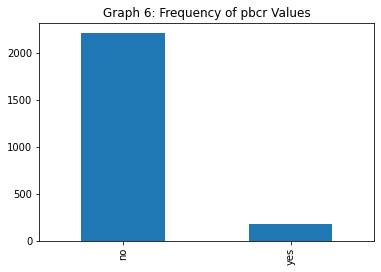

In [94]:
bplt = df['pbcr'].value_counts().plot.bar(title = "Graph 6: Frequency of pbcr Values")

Discussion of Result: This bar graph shows us that the overwhelming majority of applicants were not denied a loan.

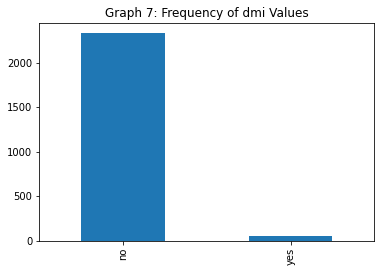

In [95]:
bplt = df['dmi'].value_counts().plot.bar(title = "Graph 7: Frequency of dmi Values")

Discussion of Result: This bar graph shows us that the overwhelming majority of applicants were not denied mortgage insurance.